## **Capstone Project of Bangkit**

Team C23-PC767


In [20]:
# The first thing to do is to import libraries

import os
import zipfile
import random
import shutil
import pandas as pd
import string
import numpy as np
from shutil import copyfile

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Dense

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [21]:
# This code aims to import the file from /content/Monkey Pod Tree Dataset with the format of the file is excel
# The excel has been uploaded to this google colab workbook
file_path = "/content/Full Dataset.xlsx"

# This code aims to read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [22]:
column_names = df.columns.tolist()
if 'heights' not in column_names or 'circumferences' not in column_names or 'ages' not in column_names:
    raise ValueError("Column names not found in the dataset.")

dataset_array = df.values

X = dataset_array[:, [column_names.index('heights'), column_names.index('circumferences')]]
y = dataset_array[:, column_names.index('ages')]


In [23]:
# In this block of code, the dataset will be converted to a numpy array

data = df.to_numpy()
print("Shape of the data array:", data.shape)

Shape of the data array: (358, 5)


In [24]:
data = pd.read_excel('/content/Full Dataset.xlsx')

#This code aims to generate the output of the dataset from the head 20  rows
data.head(5)

,heights,circumferences,ages,ratios,status
0,10,7,23,0.700000,1
1,10,7,23,0.700000,1
2,10,8,22,0.800000,1
3,10,8,25,0.800000,1
4,17,14,35,0.823529,1


In [25]:
#This code aims to generate the output of the dataset from the head 20  rows
data.tail(5)

,heights,circumferences,ages,ratios,status
353,6,30,20,5.0,0
354,5,26,23,5.2,0
355,5,27,23,5.4,0
356,5,29,23,5.8,0
357,5,30,22,6.0,0


In [26]:
# This block of code aims to normalize the data using StandardScaler

def normalize_data(df):
    heights = df['heights']
    circumferences = df['circumferences']
    ages = df['ages']

    scaler = StandardScaler()
    X = df[['heights', 'circumferences']]
    X_normalized = scaler.fit_transform(X)

    normalized_heights = X_normalized[:, 0]
    normalized_circumferences = X_normalized[:, 1]

    return normalized_heights, normalized_circumferences, scaler


In [27]:
# In this code, the data will be splitted

def split_dataset(df, test_size, dev_size):
    X = df[['heights', 'circumferences']]
    y = df['ages']

    # Process of spliting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Process of spliting the dataset into dev and test
    X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=dev_size, random_state=42)

    return X_train, X_test, X_dev, y_train, y_test, y_dev

# Then, call the function with our DataFrame and sizes for test and dev
test_size = 0.2
dev_size = 0.25 
X_train, X_test, X_dev, y_train, y_test, y_dev = split_dataset(df, test_size, dev_size)

# Last, print the shapes of the split datasets
print("Train set shapes:")
print(X_train.shape, y_train.shape)
print("Validation set shapes:")
print(X_dev.shape, y_dev.shape)
print("Test set shapes:")
print(X_test.shape, y_test.shape)


Train set shapes:
(286, 2) (286,)
Validation set shapes:
(54, 2) (54,)
Test set shapes:
(18, 2) (18,)


Epoch 1/200
9/9 [==============================] - 1s 26ms/step - loss: 2002.1132 - val_loss: 1897.2411
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 1968.1079 - val_loss: 1862.1353
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 1928.5221 - val_loss: 1820.1296
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 1878.9637 - val_loss: 1764.6349
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 1813.4670 - val_loss: 1693.2228
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 1729.2336 - val_loss: 1601.8959
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 1622.9148 - val_loss: 1488.4672
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 1493.7264 - val_loss: 1351.3651
Epoch 9/200
9/9 [==============================] - 0s 7ms/step - loss: 1339.4915 - val_loss: 1192.0657
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss:

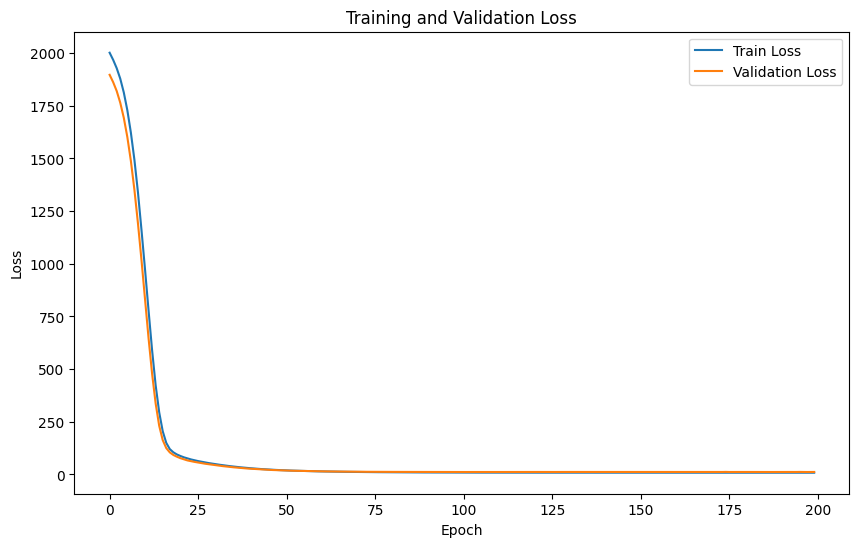

In [28]:
# In this code, the model will be trained

def train_neural_network(X_train, y_train, X_val, y_val):
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Then, create a neural network model using keras.layers
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Then, compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_val_scaled, y_val))

    model.save('LeafAge.h5')
    model.save_weights("LeafAge.weights.bin")


    return model, history

# Data preparation
X_train, X_test, X_dev, y_train, y_test, y_dev = split_dataset(df, test_size, dev_size)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

# Then, train the neural network
trained_model, history = train_neural_network(X_train_scaled, y_train, X_dev_scaled, y_dev)

# Then, evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
test_loss = trained_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

# Make predictions on the test set
y_pred = trained_model.predict(X_test_scaled)

# Last, plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [29]:
# In this block of code, the ratio will be categorized 

def categorize_ratio(heights, circumferences):
  ratio_height_circumferences = circumferences/heights
  if ratio >3 :
    categories.append("This tree has an EXCELLENT ratio")
  elif 2<= ratio <= 3:
    categories.append("This tree has an IDEAL ratio")
  else:
    categories.append("This tree has BAD ratio")
  return categories

In [30]:
# In this code, the new heights and circumferences will be inputed (option 1 of prediction)

new_heights = input("Berapa perkiraan tinggi pohonnya? ")
new_circumferences = input("Berapa keliling batang pohonnya? ")
new_heights = 24
new_circumferences = 77.0

def categorize_new_ratio(new_heights, new_circumferences):
    new_ratio_height_circumferences = new_circumferences / new_heights
    categories = []  # Define the 'categories' list
    if new_ratio_height_circumferences > 3:
        categories.append("This tree has an EXCELLENT ratio")
    elif 2 <= new_ratio_height_circumferences <= 3:
        categories.append("This tree has an IDEAL ratio")
    else:
        categories.append("This tree has a BAD ratio")
    return new_ratio_height_circumferences, categories

# This code aims to calculate mean and standard deviation of heights and circumferences
mean_heights = df['heights'].mean()
std_heights = df['heights'].std()
mean_circumferences = df['circumferences'].mean()
std_circumferences = df['circumferences'].std()

# Then, normalize new heights and circumferences
normalized_new_heights = (new_heights - mean_heights) / std_heights
normalized_new_circumferences = (new_circumferences - mean_circumferences) / std_circumferences

# Make predictions on the normalized data
prediction = trained_model.predict([[normalized_new_heights, normalized_new_circumferences]])[0]

# Categorize the new ratio
new_ratio_height_circumferences, categories = categorize_new_ratio(new_heights, new_circumferences)

print("Predicted age is:", prediction)
print("The ratio is:", new_ratio_height_circumferences)
print("Category of the ratio is:", categories)



Berapa perkiraan tinggi pohonnya? 7
Berapa keliling batang pohonnya? 24
1/1 [==============================] - 0s 65ms/step
Predicted age is: [48.56265]
The ratio is: 3.2083333333333335
Category of the ratio is: ['This tree has an EXCELLENT ratio']


In [31]:
# In this block of code, the status of the tree

if prediction > 50:
    if "This tree has an EXCELLENT ratio" in categories:
        decision = "Safe"
    else:
        decision = "You have to be careful"
else:
    if "This tree has an EXCELLENT ratio" or "This tree has an IDEAL ratio" in categories:
        decision = "Safe"
    else:
        decision = "You have to be careful"

# Print the predicted age and decision
print("Predicted age is:", prediction)
print("The ratio is:", new_ratio_height_circumferences)
print("Category of the ratio is:", categories)
print("Status is:", decision)

Predicted age is: [48.56265]
The ratio is: 3.2083333333333335
Category of the ratio is: ['This tree has an EXCELLENT ratio']
Status is: Safe


In [32]:
# We will print the model summary
trained_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [33]:
# In this block of code, the branch condition will be assessed and paired with the desired message
# Branch condition can be divided into 3 which each has 2 choices

#1
branch_1 = input("Enter your choice (a or b): ")

a = "Ranting pohon menyebar secara merata"
b = "Ranting pohon menyebar tidak merata"

if branch_1 == "a":
  print("Pohon memiliki potensi tumbang yang rendah karena memiliki ranting yang menyebar secara merata")
elif branch_1 == "b":
  print("Pohon memiliki potensi tumbang yang tinggi karena memiliki ranting yang tidak menyebar secara merata")
  print("Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan untuk dilakukan pembenahan dengan cara pemangkasan ranting pohon yang overgrow")
else:
    print("Invalid choice")

Enter your choice (a or b): a
Pohon memiliki potensi tumbang yang rendah karena memiliki ranting yang menyebar secara merata


In [34]:
#2
branch_2 = input("Enter your choice (c or d): ")

c = "Ranting terlihat sehat"
d = "Ranting terlihat stress/layu/sakit"

if branch_2 == "c":
  print("Pohon memiliki potensi tumbang yang rendah karena memiliki ranting yang sehat")
elif branch_2 == "d":
  print("Pohon memiliki potensi tumbang yang tinggi karena memiliki ranting yang stress/layu/sakit")
  print("Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan untuk dilakukan pembenahan dengan cara pemangkasan ranting pohon yang terindikasi stress/layu/sakit")
else:
    print("Invalid choice")

Enter your choice (c or d): c
Pohon memiliki potensi tumbang yang rendah karena memiliki ranting yang sehat


In [35]:
#3
branch_3 = input("Enter your choice (e or f): ")

e = "Tidak terdapat bekas luka pada ranting"
f = "Terdapat bekas luka pada ranting"

if branch_3 == "e":
  print("Pohon memiliki potensi tumbang yang rendah karena tidak memiliki bekas luka")
elif branch_3 == "f":
  print("Pohon memiliki potensi tumbang yang tinggi karena memiliki bekas luka")
  print("Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan untuk dilakukan pembenahan dengan cara pemangkasan ranting pohon yang memiliki bekas luka")
else:
    print("Invalid choice")

Enter your choice (e or f): f
Pohon memiliki potensi tumbang yang tinggi karena memiliki bekas luka
Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan untuk dilakukan pembenahan dengan cara pemangkasan ranting pohon yang memiliki bekas luka


In [36]:
# In this block of code, the root condition will be assessed and paired with the desired message
# Root condition can be divided into 2 which each has 2 choices

#1
root_1 = input("Enter your choice (a or b): ")

a = "Akar pohon tidak terlalu terpapar ke permukaan tanah"
b = "Akar pohon terpapar ke permukaan tanah"

if root_1 == "a":
  print("Pohon memiliki potensi tumbang yang rendah karena akar tidak terlalu terpapar ke permukaan tanah")
elif root_1 == "b":
  print("Pohon memiliki potensi tumbang yang tinggi karena akar terlalu terpapar ke permukaan tanah")
  print("Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan untuk penambahan pelapisan mulsa atau perbaikan permukaan tanah")
else:
    print("Invalid choice")

Enter your choice (a or b): a
Pohon memiliki potensi tumbang yang rendah karena akar tidak terlalu terpapar ke permukaan tanah


In [37]:
#2
root_2 = input("Enter your choice (c or d): ")

c = "Tidak terlihat akar busuk"
d = "Terlihat akar busuk"

if root_2 == "c":
  print("Pohon memiliki potensi tumbang yang rendah karena tidak terlihat akar busuk")
elif root_2 == "d":
  print("Pohon memiliki potensi tumbang yang tinggi karena terlihat akar busuk")
  print("Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan pemotongan akar busuk agar tidak menjalar ke akar yang lain")
else:
    print("Invalid choice")

Enter your choice (c or d): d
Pohon memiliki potensi tumbang yang tinggi karena terlihat akar busuk
Mohon hubungi pihak pemelihara kawasan untuk peninjauan lebih lanjut. Kami merekomendasikan pemotongan akar busuk agar tidak menjalar ke akar yang lain


In [38]:
# In this block of code, the surrounding environment will be assessed and paired with the desired message

sur_env = input("Enter your choice (a, b, c, d, or e): ")

a = "Hutan"
b = "Taman kota, ruang terbuka hijau, atau kebun binatang"
c = "Pantai"
d = "Tepi jalan raya"
e = "Pemukiman penduduk"

if sur_env == "a":
  print("Pohon ini berada di tempat yang aman untuk bertumbuh. Tetap berhati-hati")
elif sur_env == "b":
  print("Pohon ini berada di tempat yang aman untuk bertumbuh. Tetap berhati-hati")
elif sur_env == "c":
  print("Pohon ini berada di tempat yang aman untuk bertumbuh. Tetap berhati-hati")
elif sur_env == "d":
  print("Pohon ini berada di tempat yang aman untuk bertumbuh. Berhati-hatilah ketika berjalan atau berkendara di dekat pohon ini")
elif sur_env == "e":
  print("Pohon ini berada di tempat yang rawan untuk menyebabkan kerugian. Konsultasi lebih lanjut dengan dinas kehutanan.")
else:
    print("Invalid choice")

Enter your choice (a, b, c, d, or e): e
Pohon ini berada di tempat yang rawan untuk menyebabkan kerugian. Konsultasi lebih lanjut dengan dinas kehutanan.
